In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import catboost as cb


#Model Evaluation
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay


%matplotlib inline

In [3]:
X_train = pd.read_csv("data/X_pca_train.csv")
y_train = pd.read_csv("data/y_pca_train.csv")
X_test = pd.read_csv("data/X_pca_test.csv")
y_test = pd.read_csv("data/y_pca_test.csv")

In [4]:
X_train.drop(labels="Unnamed: 0",axis=1,inplace = True)
y_train.drop(labels="Unnamed: 0",axis=1,inplace = True)
X_test.drop(labels="Unnamed: 0",axis=1,inplace = True)
y_test.drop(labels="Unnamed: 0",axis=1,inplace = True)

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.659562,0.516831,-0.202897,-1.026486,-0.048598,0.433159,-1.075318,0.524334,-0.152486,0.049226,...,-0.001323,0.000216,-0.001795,-0.001236,0.000044,-0.002091,0.001838,0.000606,-0.002036,0.002758
1,0.347625,-0.365960,0.162271,-0.152629,-0.225253,-0.287080,0.930677,-1.234341,-0.141902,0.950156,...,-0.013643,0.007153,0.002557,-0.005970,0.015243,0.002865,-0.015619,0.003460,0.001027,-0.008627
2,0.041583,0.091616,0.864866,1.078734,0.648214,0.307664,-0.808412,-0.298021,0.873744,0.948939,...,-0.002129,0.005241,-0.005267,-0.003113,0.010213,0.004475,-0.016565,0.001285,-0.000155,-0.004740
3,-0.400023,0.774588,-0.384344,-1.558147,-0.739833,0.131701,-0.172987,0.945280,-0.421203,0.035580,...,0.008655,-0.003725,-0.000874,-0.003804,-0.000409,0.002528,-0.001423,0.000794,0.001049,0.001534
4,-0.517453,-0.803234,0.299777,0.578983,-0.893497,0.924790,0.653481,0.111630,-0.255884,-0.129372,...,0.000511,-0.006162,0.002113,0.005669,-0.005967,-0.002310,0.003041,-0.000129,-0.004669,0.000937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21794,0.499732,1.069369,-0.236199,-0.704709,0.287224,-1.316322,0.026636,-1.099106,-0.441328,-0.297552,...,-0.015920,0.004109,0.002393,-0.001974,-0.001926,-0.004173,-0.001414,-0.001963,0.002121,-0.000259
21795,0.191981,-0.533279,0.292286,-0.753397,1.657730,-1.777310,0.922488,0.178434,-0.690906,-0.257524,...,-0.007264,0.008467,-0.001736,-0.000040,-0.002618,-0.000288,-0.001360,0.004326,0.004758,0.002170
21796,-2.796506,0.118704,0.076170,-0.226791,0.562939,0.618250,-0.247849,-0.531915,-0.008104,-0.327205,...,-0.002735,-0.003668,0.002820,0.003682,-0.000298,0.000523,-0.000468,0.004846,-0.003126,-0.001901
21797,0.635947,0.381477,0.024562,0.838660,-0.753451,-0.145238,-0.682593,-0.240757,-0.350828,-0.172874,...,-0.001481,-0.000319,-0.000069,-0.000343,0.000023,-0.000019,0.000833,0.001903,-0.000101,0.002918


In [6]:
y_train

,income
0,0
1,1
2,1
3,0
4,0
...,...
21794,0
21795,0
21796,0
21797,0


In [7]:
targets = ["0" , "1"]

In [8]:
def plot_roc_and_pr_curve(model_name, model, X_test, y_test, y_pred):
    try:
        # Create RocCurveDisplay
        fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

        # Create PrecisionRecallDisplay
        pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)

        # Combining the display objects into a single plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        roc_display.plot(ax=ax1)
        pr_display.plot(ax=ax2)
        
        # Save the plot with a descriptive file name and the desired format (e.g., PNG)
        plt.savefig(f"plots/{model_name}_roc_and_pr.png")
        
        plt.show()
    except Exception as e:
        print(e)


In [9]:
# creating logging for tracking model performance
def logging(Model_name,Time,training_accuracy_score,Classification_report,Confusion_matirx):
    data  = f'''\n"ModelName" : {Model_name},
               "TrainingTime" : {Time},
               "Training Accuracy" : {training_accuracy_score},
               "ConfusionMatrics" : {Confusion_matirx},
               "ClassificationReport" : {Classification_report}\n'''
               
    with open("logs/report.txt","a+") as f:
        f.write(data)


In [10]:
def model_evaluation(ModelName,training_time, model,X_train,y_train, y_test, y_pred, X_test):
    # Calculate accuracy
    training_accuracy_score = model.score(X_train,y_train)
    print("Training Accuracy :",training_accuracy_score)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy:", accuracy)
    
    #Printing classification report
    cr = classification_report(y_test, y_pred,target_names=targets,output_dict=False)    
    print(f"\nClassification Report:\n{cr}")
    cr = classification_report(y_test, y_pred,target_names=targets,output_dict=True)

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion matirx :\n{cm}")
    
    try:
        y_pred_probs = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test,y_pred_probs[:, 1])
        print("\nAUC-ROC Score:", auc_roc)
    except Exception as e:
        print(e)
    
    print("\nPlotting Graphs\n")
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=targets)
    display.plot(include_values=True, cmap='Blues', ax=plt.gca())

    plot_roc_and_pr_curve("LogisticRegression",model,X_test,y_test,y_pred)
    
    logging(ModelName,training_accuracy_score,training_time,cr,cm)
    
    json_data = {"ModelName": ModelName,
                 "Training accuracy":training_accuracy_score,
                 "ClassificationReport": cr}
    json_file_path = "logs/json_data.json"
    with open(json_file_path, 'a+') as json_file:
        json.dump(json_data, json_file, indent=4)
     

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

{'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10)
Training time: 7.69 seconds
Training Accuracy : 0.8525161704665352

Accuracy: 0.8531383870366921

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8139
           1       0.73      0.62      0.67      2599

    accuracy                           0.85     10738
   macro avg       0.81      0.77      0.79     10738
weighted avg       0.85      0.85      0.85     10738


Confusion matirx :
[[7557  582]
 [ 995 1604]]

AUC-ROC Score: 0.904802810309011

Plotting Graphs



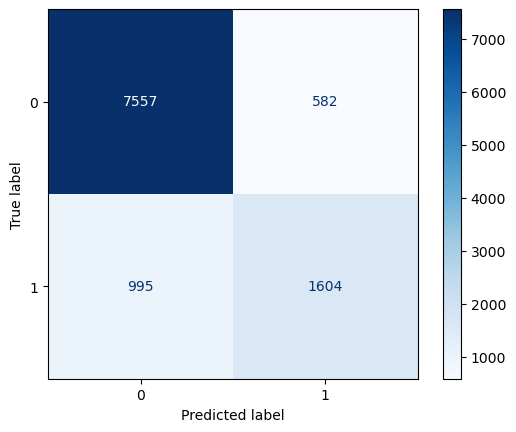

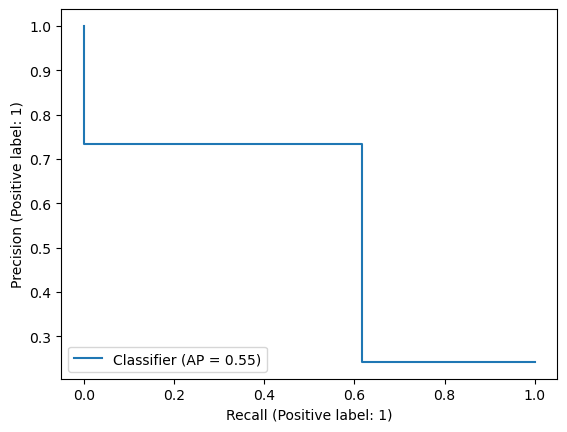

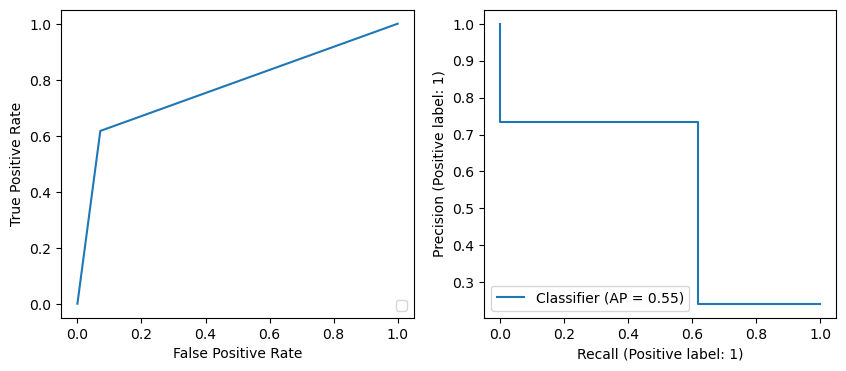

------------------------------


In [11]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

start_time = time.time()
# Create the LogisticRegression classifier
model = LogisticRegression()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

# Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

model_evaluation("LogisticRegression", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 8.62 seconds
Training Accuracy : 0.8079728427909537

Accuracy: 0.8068541627863661

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      8139
           1       0.60      0.61      0.61      2599

    accuracy                           0.81     10738
   macro avg       0.74      0.74      0.74     10738
weighted avg       0.81      0.81      0.81     10738


Confusion matirx :
[[7067 1072]
 [1002 1597]]


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



AUC-ROC Score: 0.8527521595842834

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


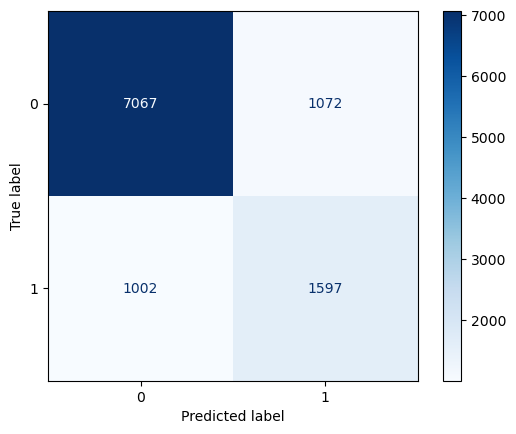

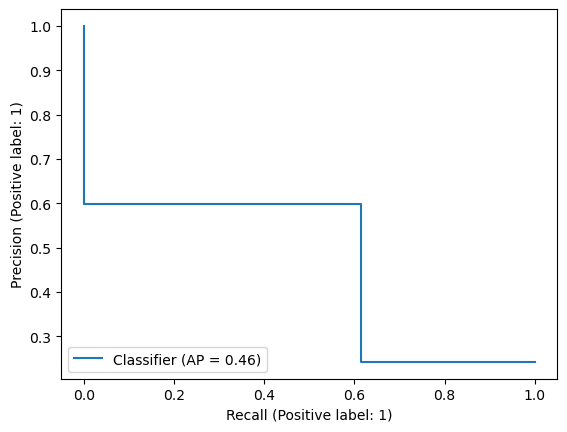

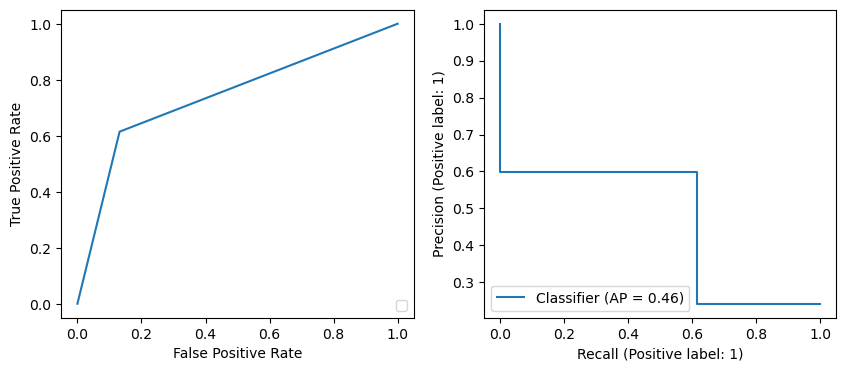

------------------------------


In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=None, var_smoothing=0.05).fit(X_train,y_train)

# Train the ensemble model
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("GaussianNB", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 16.73 seconds
Training Accuracy : 0.9999541263360705

Accuracy: 0.7941888619854721

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      8139
           1       0.57      0.60      0.58      2599

    accuracy                           0.79     10738
   macro avg       0.72      0.73      0.72     10738
weighted avg       0.80      0.79      0.80     10738


Confusion matirx :
[[6975 1164]
 [1046 1553]]

AUC-ROC Score: 0.7272364766831931

Plotting Graphs



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


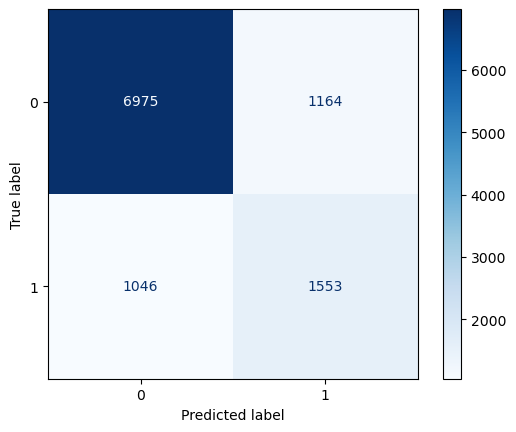

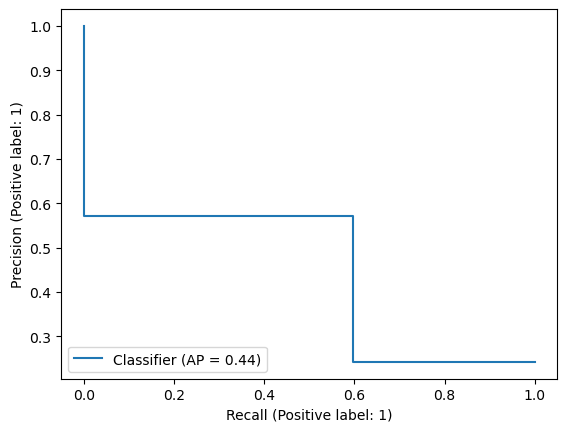

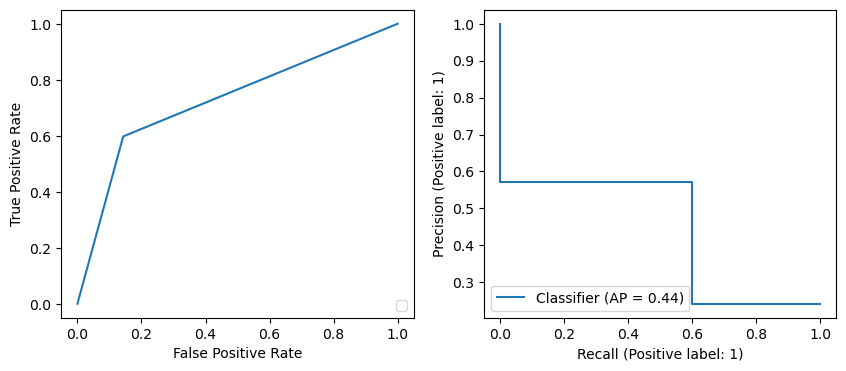

------------------------------


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("DecisionTreeClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 1394.14 seconds
{'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=10)
Training Accuracy : 0.9004082756089729

Accuracy: 0.8463401005773887

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8139
           1       0.75      0.55      0.63      2599

    accuracy                           0.85     10738
   macro avg       0.81      0.75      0.77     10738
weighted avg       0.84      0.85      0.84     10738


Confusion matirx :
[[7657  482]
 [1168 1431]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9000281800522387

Plotting Graphs



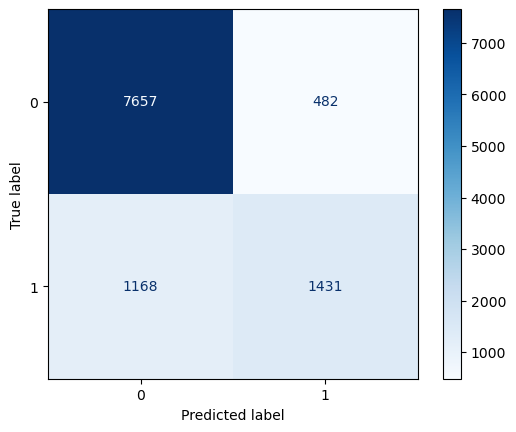

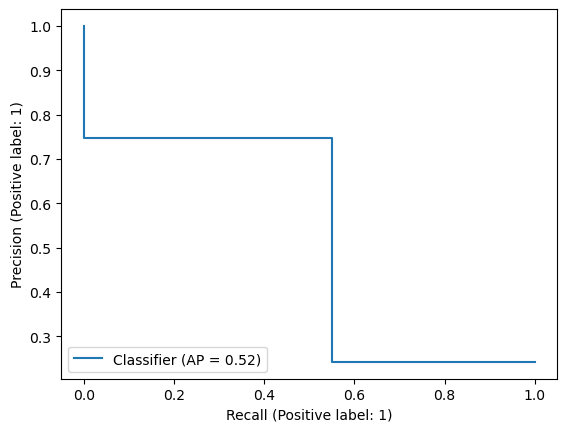

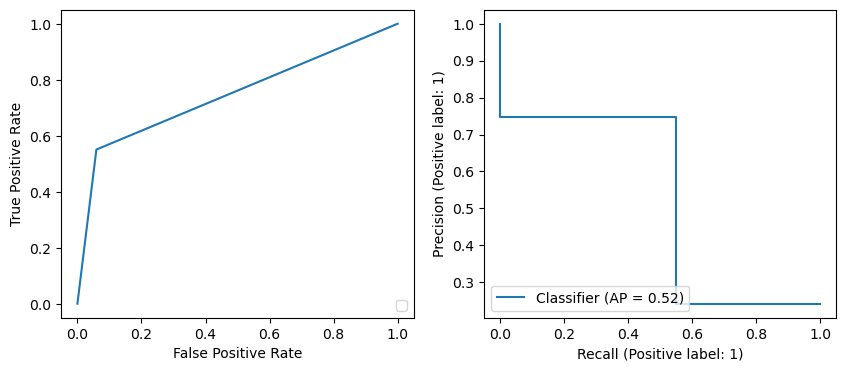

------------------------------


In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

start_time = time.time()
# Create the RandomForestClassifier
model = RandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("RandomForestClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 1474.66 seconds
{'C': 1, 'kernel': 'rbf'}
SVC(C=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Training Accuracy : 0.8693518051286756

Accuracy: 0.8537902775190911

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8139
           1       0.75      0.59      0.66      2599

    accuracy                           0.85     10738
   macro avg       0.81      0.77      0.78     10738
weighted avg       0.85      0.85      0.85     10738


Confusion matirx :
[[7623  516]
 [1054 1545]]
predict_proba is not available when  probability=False

Plotting Graphs



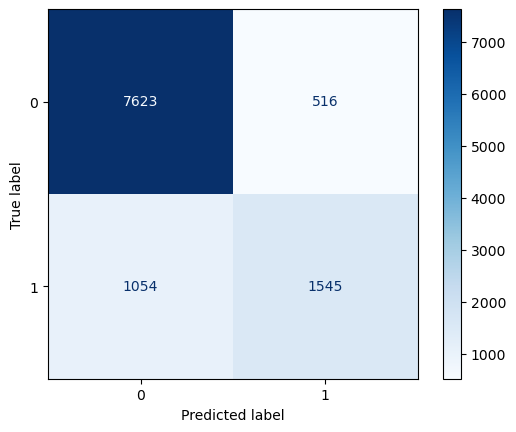

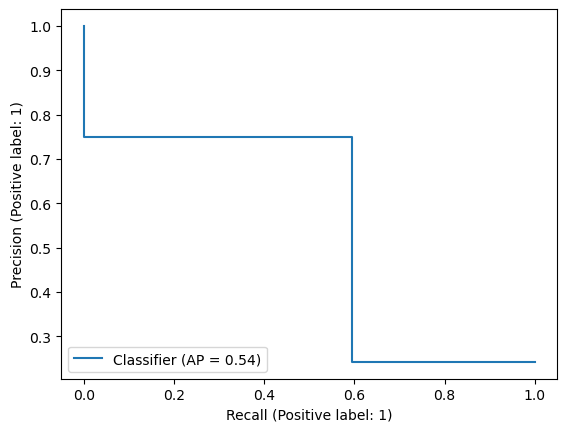

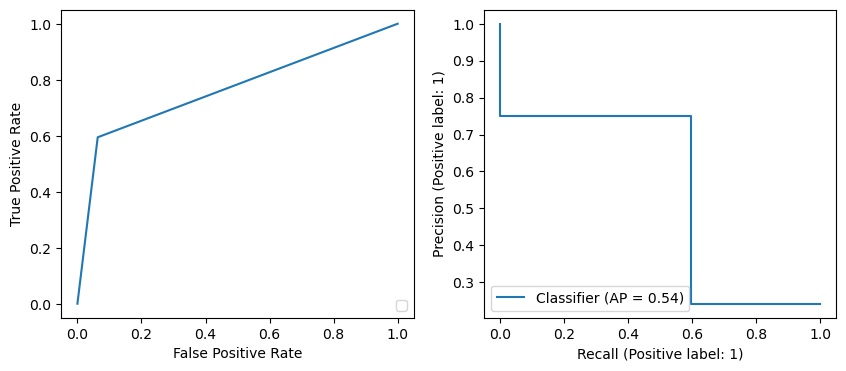

------------------------------


In [15]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

start_time = time.time()
# Create the SVC classifier
model = SVC()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("SVC", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 3246.03 seconds
{'learning_rate': 0.1, 'n_estimators': 300}
GradientBoostingClassifier(n_estimators=300)
Training Accuracy : 0.8877012707004909

Accuracy: 0.8520208604954368

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8139
           1       0.73      0.61      0.67      2599

    accuracy                           0.85     10738
   macro avg       0.81      0.77      0.79     10738
weighted avg       0.85      0.85      0.85     10738



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Confusion matirx :
[[7566  573]
 [1016 1583]]

AUC-ROC Score: 0.9069338292568696

Plotting Graphs



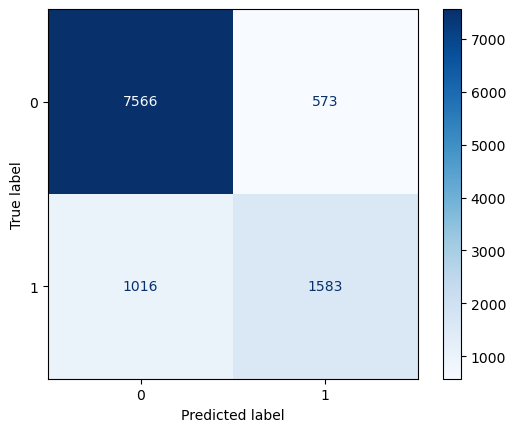

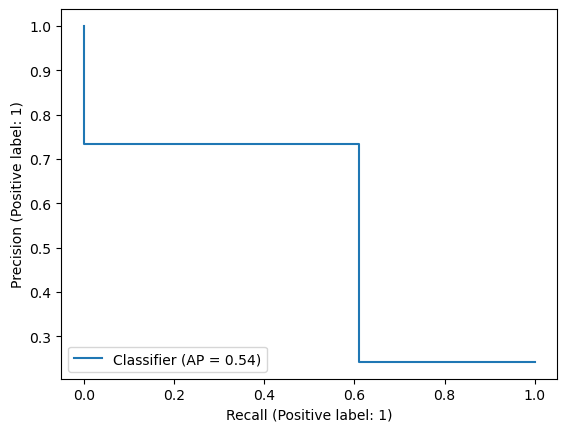

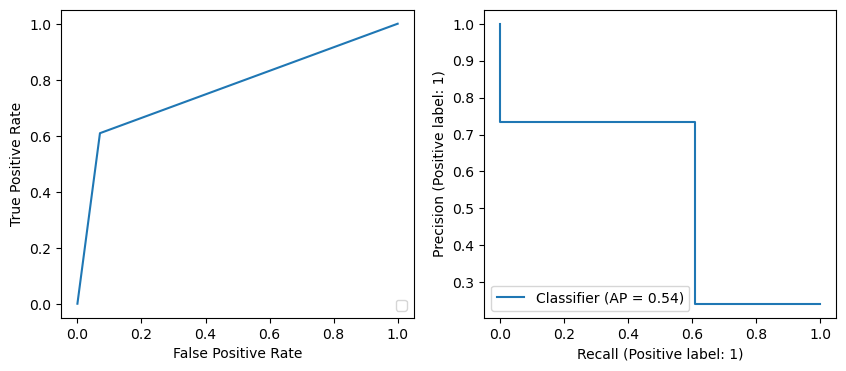

------------------------------


In [16]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the GradientBoostingClassifier
model = GradientBoostingClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("GradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

Training time: 630.91 seconds
{'learning_rate': 0.1, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Training Accuracy : 0.9026102114775907

Accuracy: 0.8556528217545166

Classification Report:
              precision    recall  f1-score   support

           0       0.89    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


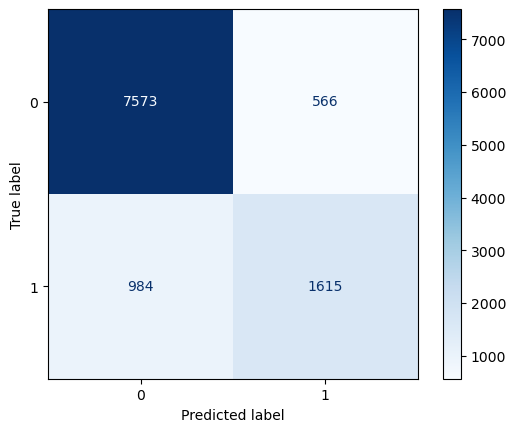

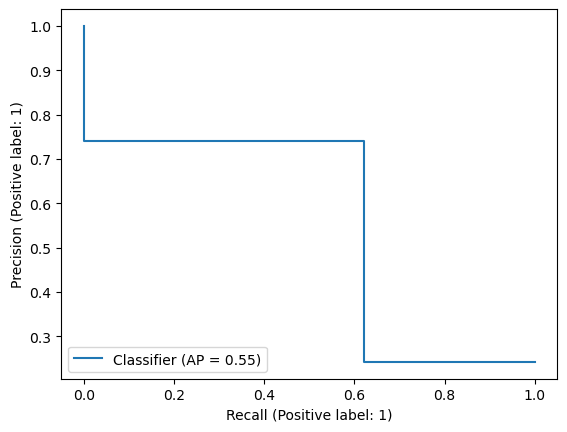

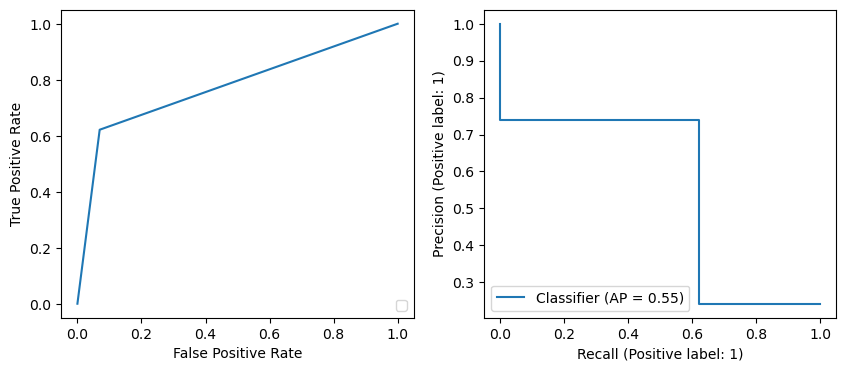

------------------------------


In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the XGBClassifier
model = XGBClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("XGBClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 30.56 seconds
{'learning_rate': 0.1, 'max_depth': None}
HistGradientBoostingClassifier()
Training Accuracy : 0.8940777099866967

Accuracy: 0.8541627863661762

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8139
           1       0.74      0.61      0.67      2599

    accuracy                           0.85     10738
   macro avg       0.81      0.77      0.79     10738
weighted avg       0.85      0.85      0.85     10738


Confusion matirx :
[[7576  563]
 [1003 1596]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9088757757019119

Plotting Graphs



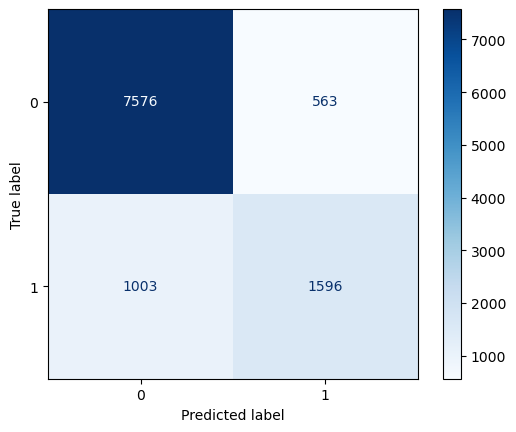

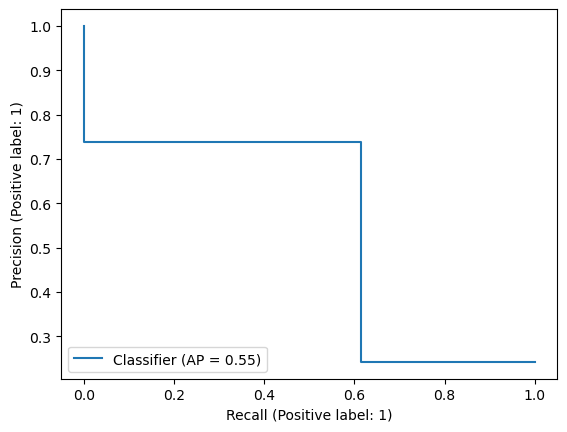

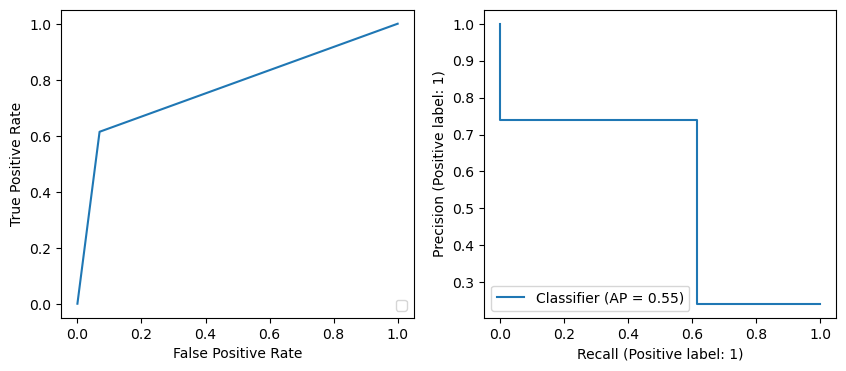

------------------------------


In [18]:
param_grid = {
    'max_depth': [None, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("HistGradientBoostingClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\RACHIT\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 453.16 seconds
{'max_depth': None, 'n_estimators': 100}
BalancedRandomForestClassifier()
Training Accuracy : 0.9050415156658562

Accuracy: 0.8010802756565468

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      8139
           1       0.56      0.84      0.67      2599

    accuracy                           0.80     10738
   macro avg       0.75      0.81      0.76     10738
weighted avg       0.85      0.80      0.81     10738


Confusion matirx :
[[6424 1715]
 [ 421 2178]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.8928820241947566

Plotting Graphs



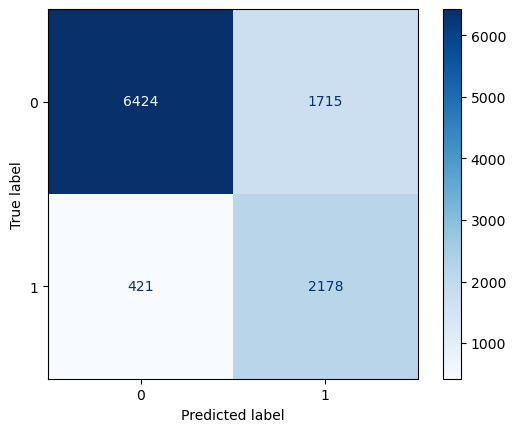

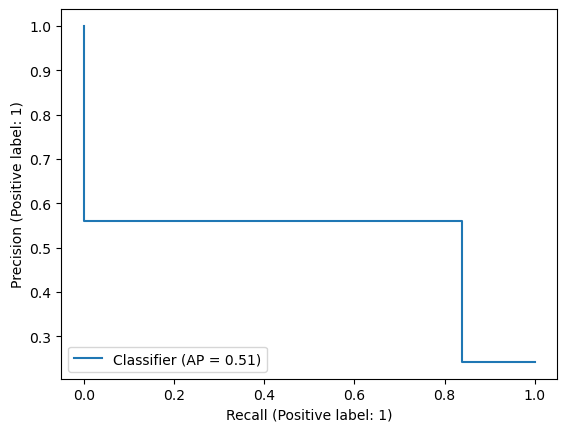

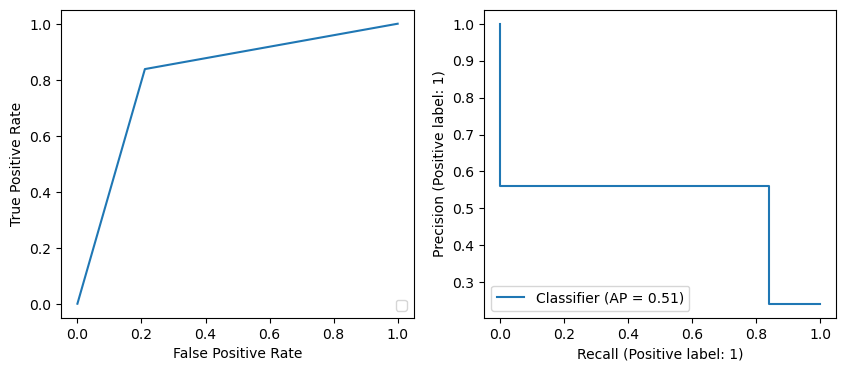

------------------------------


In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

start_time = time.time()
# Create the BalancedRandomForestClassifier
model = BalancedRandomForestClassifier()

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("BalancedRandomForestClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 631.47 seconds
{'learning_rate': 0.2, 'n_estimators': 200}
AdaBoostClassifier(learning_rate=0.2, n_estimators=200)
Training Accuracy : 0.8567824212119822

Accuracy: 0.851089588377724

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      8139
           1       0.73      0.61      0.66      2599

    accuracy                           0.85     10738
   macro avg       0.81      0.77      0.78     10738
weighted avg       0.84      0.85      0.85     10738


Confusion matirx :
[[7563  576]
 [1023 1576]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9038053045343694

Plotting Graphs



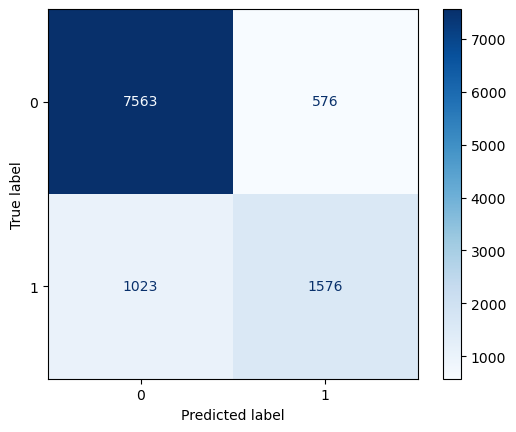

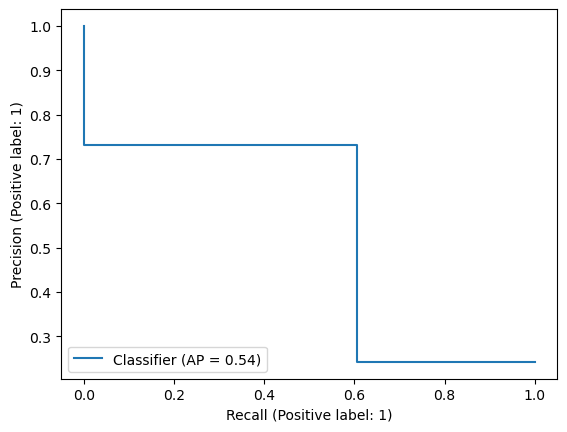

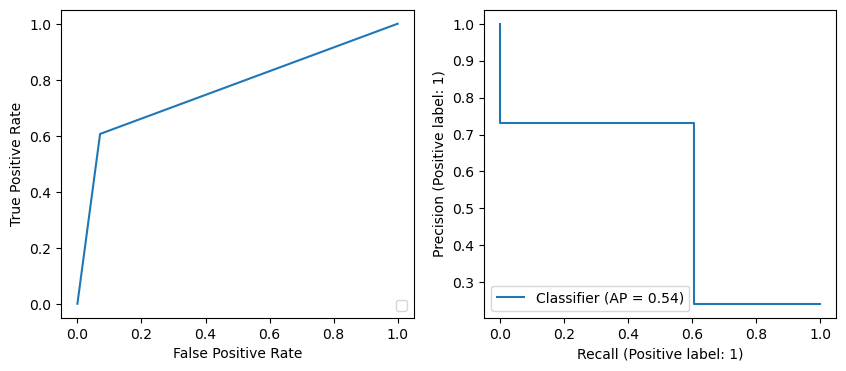

------------------------------


In [20]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

start_time = time.time()
# Create the AdaBoostClassifier
model = AdaBoostClassifier(learning_rate=0.2, n_estimators=200)

# Perform hyperparameter tuning using GridSearchCV
model = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))
# # Get the best hyperparameters and the best model
best_params = model.best_params_
best_lr_classifier = model.best_estimator_

print(best_params)
print(best_lr_classifier)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("AdaBoostClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

0:	learn: 0.8097160	total: 203ms	remaining: 3m 22s
1:	learn: 0.8244874	total: 229ms	remaining: 1m 54s
2:	learn: 0.8297628	total: 258ms	remaining: 1m 25s
3:	learn: 0.8331116	total: 285ms	remaining: 1m 10s
4:	learn: 0.8337538	total: 312ms	remaining: 1m 2s
5:	learn: 0.8366898	total: 337ms	remaining: 55.8s
6:	learn: 0.8375614	total: 365ms	remaining: 51.7s
7:	learn: 0.8388917	total: 390ms	remaining: 48.4s
8:	learn: 0.8407725	total: 438ms	remaining: 48.2s
9:	learn: 0.8410478	total: 483ms	remaining: 47.8s
10:	learn: 0.8426533	total: 514ms	remaining: 46.2s
11:	learn: 0.8438919	total: 544ms	remaining: 44.8s
12:	learn: 0.8444883	total: 576ms	remaining: 43.7s
13:	learn: 0.8454058	total: 610ms	remaining: 42.9s
14:	learn: 0.8457269	total: 638ms	remaining: 41.9s
15:	learn: 0.8471490	total: 666ms	remaining: 41s
16:	learn: 0.8464608	total: 696ms	remaining: 40.3s
17:	learn: 0.8465067	total: 723ms	remaining: 39.4s
18:	learn: 0.8470113	total: 753ms	remaining: 38.9s
19:	learn: 0.8486628	total: 778ms	remai

166:	learn: 0.8763246	total: 4.39s	remaining: 21.9s
167:	learn: 0.8762787	total: 4.41s	remaining: 21.9s
168:	learn: 0.8765998	total: 4.44s	remaining: 21.8s
169:	learn: 0.8768751	total: 4.46s	remaining: 21.8s
170:	learn: 0.8766916	total: 4.49s	remaining: 21.7s
171:	learn: 0.8767833	total: 4.51s	remaining: 21.7s
172:	learn: 0.8770586	total: 4.53s	remaining: 21.7s
173:	learn: 0.8771962	total: 4.55s	remaining: 21.6s
174:	learn: 0.8774714	total: 4.58s	remaining: 21.6s
175:	learn: 0.8777008	total: 4.6s	remaining: 21.6s
176:	learn: 0.8779761	total: 4.63s	remaining: 21.5s
177:	learn: 0.8781137	total: 4.65s	remaining: 21.5s
178:	learn: 0.8780678	total: 4.67s	remaining: 21.4s
179:	learn: 0.8780678	total: 4.7s	remaining: 21.4s
180:	learn: 0.8780219	total: 4.72s	remaining: 21.4s
181:	learn: 0.8782972	total: 4.75s	remaining: 21.3s
182:	learn: 0.8780678	total: 4.77s	remaining: 21.3s
183:	learn: 0.8786183	total: 4.8s	remaining: 21.3s
184:	learn: 0.8786183	total: 4.82s	remaining: 21.2s
185:	learn: 0.8

326:	learn: 0.8928391	total: 8.26s	remaining: 17s
327:	learn: 0.8928850	total: 8.29s	remaining: 17s
328:	learn: 0.8929309	total: 8.31s	remaining: 17s
329:	learn: 0.8932520	total: 8.34s	remaining: 16.9s
330:	learn: 0.8936190	total: 8.36s	remaining: 16.9s
331:	learn: 0.8936648	total: 8.38s	remaining: 16.9s
332:	learn: 0.8937107	total: 8.41s	remaining: 16.8s
333:	learn: 0.8937107	total: 8.43s	remaining: 16.8s
334:	learn: 0.8938483	total: 8.46s	remaining: 16.8s
335:	learn: 0.8938483	total: 8.48s	remaining: 16.8s
336:	learn: 0.8939860	total: 8.5s	remaining: 16.7s
337:	learn: 0.8940777	total: 8.53s	remaining: 16.7s
338:	learn: 0.8943530	total: 8.55s	remaining: 16.7s
339:	learn: 0.8940777	total: 8.58s	remaining: 16.6s
340:	learn: 0.8941236	total: 8.6s	remaining: 16.6s
341:	learn: 0.8939401	total: 8.62s	remaining: 16.6s
342:	learn: 0.8940318	total: 8.65s	remaining: 16.6s
343:	learn: 0.8943071	total: 8.67s	remaining: 16.5s
344:	learn: 0.8945823	total: 8.69s	remaining: 16.5s
345:	learn: 0.894444

490:	learn: 0.9041240	total: 12.4s	remaining: 12.8s
491:	learn: 0.9039864	total: 12.4s	remaining: 12.8s
492:	learn: 0.9042158	total: 12.4s	remaining: 12.8s
493:	learn: 0.9039864	total: 12.5s	remaining: 12.8s
494:	learn: 0.9043993	total: 12.5s	remaining: 12.7s
495:	learn: 0.9043075	total: 12.5s	remaining: 12.7s
496:	learn: 0.9043993	total: 12.5s	remaining: 12.7s
497:	learn: 0.9042617	total: 12.5s	remaining: 12.6s
498:	learn: 0.9042158	total: 12.6s	remaining: 12.6s
499:	learn: 0.9048121	total: 12.6s	remaining: 12.6s
500:	learn: 0.9046745	total: 12.6s	remaining: 12.6s
501:	learn: 0.9046745	total: 12.6s	remaining: 12.5s
502:	learn: 0.9049498	total: 12.7s	remaining: 12.5s
503:	learn: 0.9049956	total: 12.7s	remaining: 12.5s
504:	learn: 0.9046287	total: 12.7s	remaining: 12.5s
505:	learn: 0.9045828	total: 12.7s	remaining: 12.4s
506:	learn: 0.9049039	total: 12.8s	remaining: 12.4s
507:	learn: 0.9049498	total: 12.8s	remaining: 12.4s
508:	learn: 0.9049956	total: 12.8s	remaining: 12.4s
509:	learn: 

653:	learn: 0.9127942	total: 16.6s	remaining: 8.77s
654:	learn: 0.9127024	total: 16.6s	remaining: 8.74s
655:	learn: 0.9129777	total: 16.6s	remaining: 8.71s
656:	learn: 0.9130235	total: 16.6s	remaining: 8.69s
657:	learn: 0.9132988	total: 16.7s	remaining: 8.66s
658:	learn: 0.9133905	total: 16.7s	remaining: 8.64s
659:	learn: 0.9133905	total: 16.7s	remaining: 8.61s
660:	learn: 0.9133905	total: 16.7s	remaining: 8.59s
661:	learn: 0.9135281	total: 16.8s	remaining: 8.56s
662:	learn: 0.9133446	total: 16.8s	remaining: 8.54s
663:	learn: 0.9134364	total: 16.8s	remaining: 8.51s
664:	learn: 0.9137575	total: 16.8s	remaining: 8.49s
665:	learn: 0.9137116	total: 16.9s	remaining: 8.46s
666:	learn: 0.9137575	total: 16.9s	remaining: 8.43s
667:	learn: 0.9138493	total: 16.9s	remaining: 8.41s
668:	learn: 0.9136199	total: 16.9s	remaining: 8.38s
669:	learn: 0.9136658	total: 17s	remaining: 8.36s
670:	learn: 0.9136199	total: 17s	remaining: 8.33s
671:	learn: 0.9138493	total: 17s	remaining: 8.31s
672:	learn: 0.9138

817:	learn: 0.9224276	total: 20.9s	remaining: 4.66s
818:	learn: 0.9225194	total: 21s	remaining: 4.63s
819:	learn: 0.9224276	total: 21s	remaining: 4.61s
820:	learn: 0.9225653	total: 21s	remaining: 4.58s
821:	learn: 0.9227946	total: 21.1s	remaining: 4.56s
822:	learn: 0.9228405	total: 21.1s	remaining: 4.53s
823:	learn: 0.9228405	total: 21.1s	remaining: 4.51s
824:	learn: 0.9226570	total: 21.1s	remaining: 4.48s
825:	learn: 0.9229322	total: 21.2s	remaining: 4.46s
826:	learn: 0.9230240	total: 21.2s	remaining: 4.43s
827:	learn: 0.9229781	total: 21.2s	remaining: 4.41s
828:	learn: 0.9232075	total: 21.2s	remaining: 4.38s
829:	learn: 0.9229781	total: 21.3s	remaining: 4.36s
830:	learn: 0.9230699	total: 21.3s	remaining: 4.33s
831:	learn: 0.9232075	total: 21.3s	remaining: 4.3s
832:	learn: 0.9231616	total: 21.3s	remaining: 4.28s
833:	learn: 0.9233910	total: 21.4s	remaining: 4.25s
834:	learn: 0.9236203	total: 21.4s	remaining: 4.23s
835:	learn: 0.9236203	total: 21.4s	remaining: 4.2s
836:	learn: 0.923803

980:	learn: 0.9319694	total: 25.6s	remaining: 496ms
981:	learn: 0.9317859	total: 25.6s	remaining: 470ms
982:	learn: 0.9317859	total: 25.6s	remaining: 443ms
983:	learn: 0.9318317	total: 25.7s	remaining: 417ms
984:	learn: 0.9320611	total: 25.7s	remaining: 391ms
985:	learn: 0.9322446	total: 25.7s	remaining: 365ms
986:	learn: 0.9321987	total: 25.8s	remaining: 339ms
987:	learn: 0.9322905	total: 25.8s	remaining: 313ms
988:	learn: 0.9322905	total: 25.8s	remaining: 287ms
989:	learn: 0.9321070	total: 25.8s	remaining: 261ms
990:	learn: 0.9321529	total: 25.9s	remaining: 235ms
991:	learn: 0.9321529	total: 25.9s	remaining: 209ms
992:	learn: 0.9321987	total: 25.9s	remaining: 183ms
993:	learn: 0.9322905	total: 26s	remaining: 157ms
994:	learn: 0.9321987	total: 26s	remaining: 131ms
995:	learn: 0.9321070	total: 26s	remaining: 104ms
996:	learn: 0.9323363	total: 26s	remaining: 78.4ms
997:	learn: 0.9321987	total: 26.1s	remaining: 52.2ms
998:	learn: 0.9318317	total: 26.1s	remaining: 26.1ms
999:	learn: 0.931

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


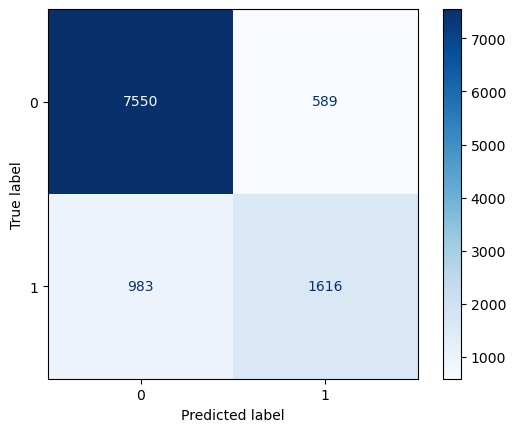

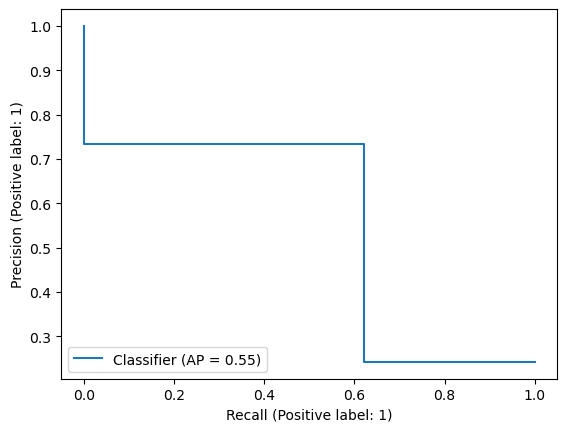

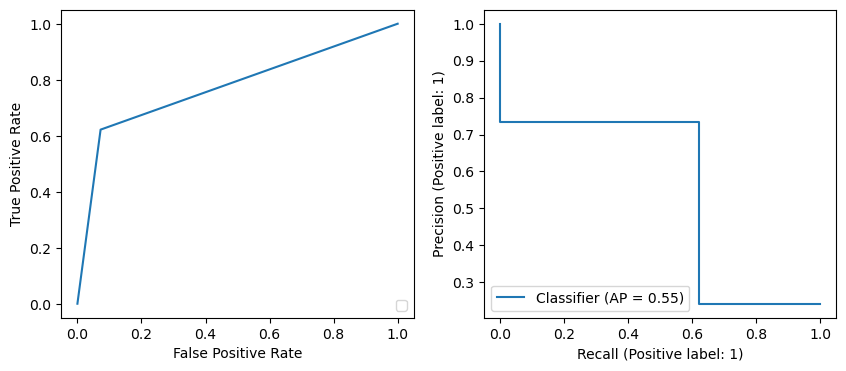

------------------------------


In [21]:
from sklearn.model_selection import train_test_split

start_time = time.time()
# Initialize the CatBoost classifier
model = cb.CatBoostClassifier(iterations=1000,  # Number of boosting iterations (trees)
                                       learning_rate=0.1,  # Learning rate (controls the step size during optimization)
                                       depth=6,  # Depth of the trees
                                       loss_function='MultiClass',  # For multi-class classification tasks
                                       eval_metric='Accuracy',  # Evaluation metric during training
                                       random_seed=42)  # Random seed for reproducibility

# Fit the model on the training data
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("CatBoostClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")

[LightGBM] [Info] Number of positive: 5240, number of negative: 16559
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14025
[LightGBM] [Info] Number of data points in the train set: 21799, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240378 -> initscore=-1.150608
[LightGBM] [Info] Start training from score -1.150608


C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RACHIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training time: 0.98 seconds
Training Accuracy : 0.8862333134547457

Accuracy: 0.8568634755075433

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8139
           1       0.75      0.62      0.68      2599

    accuracy                           0.86     10738
   macro avg       0.82      0.78      0.79     10738
weighted avg       0.85      0.86      0.85     10738


Confusion matirx :
[[7597  542]
 [ 995 1604]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



AUC-ROC Score: 0.9104163183161216

Plotting Graphs



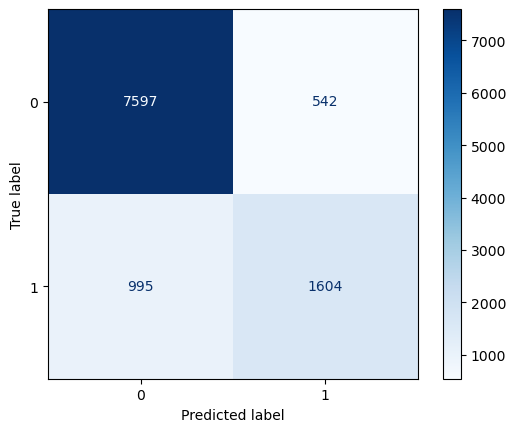

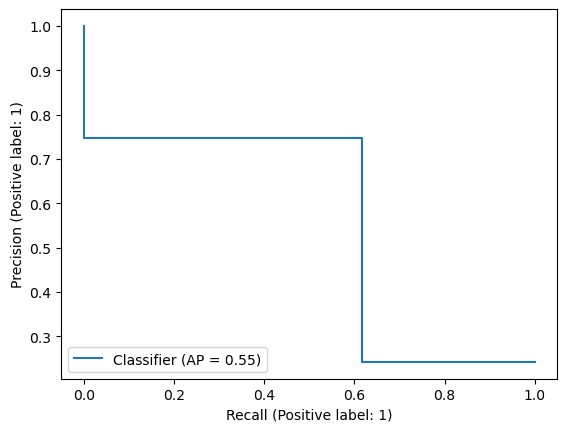

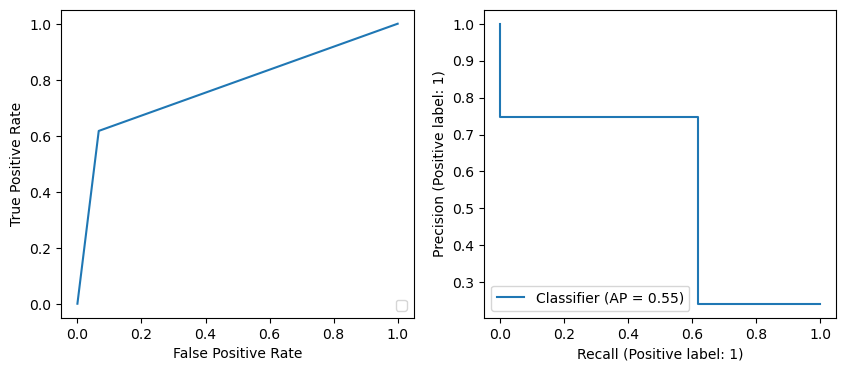

------------------------------


In [22]:
start_time = time.time()
# Assuming you have your features and labels in the variables X_train and y_train
model = lgb.LGBMClassifier(boosting_type='gbdt',  # 'gbdt' for gradient boosting decision trees
                                    num_leaves=31,  # Number of leaves in each decision tree
                                    learning_rate=0.05,  # Learning rate (controls the step size during optimization)
                                    n_estimators=100,  # Number of boosting iterations (trees)
                                    objective='binary',  # For multi-class classification tasks
                                    random_state=42)  # Random seed for reproducibility

# Fit the model on the training data
model.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))

# Make predictions on the test data
y_pred = model.predict(X_test)

model_evaluation("LGBMClassifier", training_time, model,X_train,y_train, y_test, y_pred, X_test)

print("------------------------------")